In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/TransformersAllYears/dfTransformersAllYears.csv
/kaggle/input/2023-kaggle-ai-report/sample_submission.csv
/kaggle/input/2023-kaggle-ai-report/arxiv_metadata_20230510.json
/kaggle/input/2023-kaggle-ai-report/kaggle_writeups_20230510.csv
/kaggle/input/AIMusic1000/AIMusic1000.csv
/kaggle/input/Input/Music_2022_2023_final.csv
/kaggle/input/Input/Music_B42021_final.csv


In [5]:
import re

In [6]:
pd.set_option('display.max_colwidth', None)

In [7]:
df = pd.read_json('/kaggle/input/2023-kaggle-ai-report/arxiv_metadata_20230510.json', lines=True)

In [8]:
df.abstract[0]

'  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from the Fermilab Tevatron, and predictions are made for\nmore detailed tests with CDF and DO data. Predictions are shown for\ndistributions of diphoton pairs produced at the energy of the Large Hadron\nCollider (LHC). Distributions of the diphoton pairs from the decay of a Higgs\nboson are contrasted with those produced from QCD processes at the LHC, showing\nthat enhanced sensitivity to the signal can be obtained with judicious\nselection of events.\n'

In [10]:
# df.to_csv('/kaggle/working/musicAI.csv', index=True, header=True)

In [11]:
df.columns

Index(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'],
      dtype='object')

### PLOT Number of Papers by Year

In [12]:
dfVersions = pd.DataFrame(df['versions'].apply(lambda x: [version['created'][-17:-13] for version in x if version['version'] == 'v1'][0] if any(version['version'] == 'v1' for version in x) else None))

In [13]:
dfVersions

,versions
0,2007
1,2007
2,2007
3,2007
4,2007
...,...
2250218,1996
2250219,1996
2250220,1996
2250221,1996


In [14]:
dfVersions['versions'].value_counts()

2022    185976
2021    181599
2020    178275
2019    155917
2018    140377
2017    123781
2016    113440
2015    105130
2014     97590
2013     92875
2012     84374
2011     76602
2010     70288
2023     64429
2009     64071
2008     58810
2007     55749
2006     50305
2005     46874
2004     43713
2003     39392
2002     36105
2001     33140
2000     30669
1999     27700
1998     24170
1997     19610
1996     15872
1995     13006
1994     10078
1993      6729
1992      3190
1991       353
1990        26
1989         6
1988         1
1986         1
Name: versions, dtype: int64

In [15]:
dfVersions.max()

versions    2023
dtype: object

In [16]:
dfVersions['versions'].value_counts().dtypes

dtype('int64')

In [17]:
import plotly.graph_objects as go

years = dfVersions['versions'].value_counts().index.tolist()
no_of_papers = dfVersions['versions'].value_counts().values.tolist()

index_2023 = years.index('2023')
years.insert(0, years.pop(index_2023))
no_of_papers.insert(0, no_of_papers.pop(index_2023))

colors = ['blue' if year in ['2022', '2023'] else 'lightblue' for year in years]

fig = go.Figure(data=[go.Bar(x=years, y=no_of_papers, marker_color=colors)])

fig.update_layout(
    title='Number of Papers by Year',
    xaxis_title='Years',
    yaxis_title='No of papers',
    xaxis_tickangle=-45,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
)

fig.show()


# Filter CS papers

In [18]:
CSkeywords = ['computer science', 'algorithm', 'programming', 'data structure', 'artificial intelligence',
            'machine learning', 'data mining', 'computer vision', 'natural language processing',
            'software engineering', 'human-computer interaction', 'database', 'networking', 'cybersecurity',
            'cloud computing', 'big data', 'web development', 'image processing', 'parallel computing',
            'operating systems', 'information retrieval', 'computer graphics', 'computer architecture',
            'computer networks', 'distributed systems', 'data science', 'bioinformatics', 'AI',
            'Artificial Intelligence', 'ML', 'Machine Learning', 'Transformers', 'LLMS',
            'Large Language Models', 'Machine Vision', 'LSTM', 'CNN', 'Deep Learning',
            'Neural Networks', 'Natural Language Processing', 'Computer Vision',
            'Reinforcement Learning', 'Generative Models', 'Robotic Process Automation',
            'Speech Recognition', 'Virtual Assistants', 'Recommendation Systems',
            'Data Science', 'Data Mining', 'Big Data', 'Pattern Recognition',
            'Predictive Analytics', 'Image Recognition', 'Supervised Learning',
            'Unsupervised Learning', 'Semi-Supervised Learning', 'Transfer Learning',
            'AutoML', 'Data Engineering', 'Data Preprocessing', 'Data Visualization',
            'Feature Extraction', 'Dimensionality Reduction', 'Ensemble Learning',
            'Cloud Computing', 'Internet of Things', 'Chatbots',
            'Deep Reinforcement Learning', 'Self-Supervised Learning',
            'Explainable AI', 'Bias in AI', 'Ethical AI', 'AI Governance', 'AI Ethics']


In [19]:
dfMusicCS = df[ df['title'].apply(lambda abstract: any(keyword in abstract for keyword in CSkeywords))|
    df['abstract'].apply(lambda abstract: any(keyword in abstract for keyword in CSkeywords))]

In [20]:
dfCS = dfMusicCS

In [21]:
df.shape

(2250223, 14)

In [22]:
dfCS.shape

(343497, 14)

In [23]:
dfCS.columns

Index(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'],
      dtype='object')

In [24]:
dftitleabstract = dfCS[['title', 'abstract']]

In [25]:
dftitleabstract.head()

,title,abstract
1,Sparsity-certifying Graph Decompositions,"We describe a new algorithm, the $(k,\ell)$-pebble game with colors, and use\nit obtain a characterization of the family of $(k,\ell)$-sparse graphs and\nalgorithmic solutions to a family of problems concerning tree decompositions of\ngraphs. Special instances of sparse graphs appear in rigidity theory and have\nreceived increased attention in recent years. In particular, our colored\npebbles generalize and strengthen the previous results of Lee and Streinu and\ngive a new proof of the Tutte-Nash-Williams characterization of arboricity. We\nalso present a new decomposition that certifies sparsity based on the\n$(k,\ell)$-pebble game with colors. Our work also exposes connections between\npebble game algorithms and previous sparse graph algorithms by Gabow, Gabow and\nWestermann and Hendrickson.\n"
10,Computing genus 2 Hilbert-Siegel modular forms over $\Q(\sqrt{5})$ via\n the Jacquet-Langlands correspondence,"In this paper we present an algorithm for computing Hecke eigensystems of\nHilbert-Siegel cusp forms over real quadratic fields of narrow class number\none. We give some illustrative examples using the quadratic field\n$\Q(\sqrt{5})$. In those examples, we identify Hilbert-Siegel eigenforms that\nare possible lifts from Hilbert eigenforms.\n"
47,Inference on white dwarf binary systems using the first round Mock LISA\n Data Challenges data sets,"We report on the analysis of selected single source data sets from the first\nround of the Mock LISA Data Challenges (MLDC) for white dwarf binaries. We\nimplemented an end-to-end pipeline consisting of a grid-based coherent\npre-processing unit for signal detection, and an automatic Markov Chain Monte\nCarlo post-processing unit for signal evaluation. We demonstrate that signal\ndetection with our coherent approach is secure and accurate, and is increased\nin accuracy and supplemented with additional information on the signal\nparameters by our Markov Chain Monte Carlo approach. We also demonstrate that\nthe Markov Chain Monte Carlo routine is additionally able to determine\naccurately the noise level in the frequency window of interest.\n"
48,An algorithm for the classification of smooth Fano polytopes,"We present an algorithm that produces the classification list of smooth Fano\nd-polytopes for any given d. The input of the algorithm is a single number,\nnamely the positive integer d. The algorithm has been used to classify smooth\nFano d-polytopes for d<=7. There are 7622 isomorphism classes of smooth Fano\n6-polytopes and 72256 isomorphism classes of smooth Fano 7-polytopes.\n"
61,On-line Viterbi Algorithm and Its Relationship to Random Walks,"In this paper, we introduce the on-line Viterbi algorithm for decoding hidden\nMarkov models (HMMs) in much smaller than linear space. Our analysis on\ntwo-state HMMs suggests that the expected maximum memory used to decode\nsequence of length $n$ with $m$-state HMM can be as low as $\Theta(m\log n)$,\nwithout a significant slow-down compared to the classical Viterbi algorithm.\nClassical Viterbi algorithm requires $O(mn)$ space, which is impractical for\nanalysis of long DNA sequences (such as complete human genome chromosomes) and\nfor continuous data streams. We also experimentally demonstrate the performance\nof the on-line Viterbi algorithm on a simple HMM for gene finding on both\nsimulated and real DNA sequences.\n"


In [26]:
dftitleabstract.to_csv('dfCS.csv')

### Filter AI ML papers

In [27]:
AI_keywords = ['AI', 'Artificial Intelligence', 'ML', 'Machine Learning', 'Transformers', 'LLMS', 'Large Language Models', 'Machine Vision', 'LSTM', 'CNN', 'Deep Learning', 'Neural Networks', 'Natural Language Processing', 'Computer Vision', 'Reinforcement Learning', 'Generative Models', 'Robotic Process Automation', 'Speech Recognition', 'Virtual Assistants', 'Recommendation Systems', 'Data Science', 'Data Mining', 'Big Data', 'Pattern Recognition', 'Predictive Analytics', 'Image Recognition', 'Supervised Learning', 'Unsupervised Learning', 'Semi-Supervised Learning', 'Transfer Learning', 'AutoML', 'Data Engineering', 'Data Preprocessing', 'Data Visualization', 'Feature Extraction', 'Dimensionality Reduction', 'Ensemble Learning', 'Cloud Computing', 'Internet of Things', 'Chatbots', 'Deep Reinforcement Learning', 'Self-Supervised Learning', 'Explainable AI', 'Bias in AI', 'Ethical AI', 'AI Governance', 'AI Ethics']

In [28]:
df['abstract'][0:2]

0      A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from the Fermilab Tevatron, and predictions are made for\nmore detailed tests with CDF and DO data. Predictions are shown for\ndistributions of diphoton pairs produced at the energy of the Large Hadron\nCollider (LHC). Distributions of the diphoton pairs from the decay of a Higgs\nboson are contrasted with those produced from QCD processes at the LHC, showing\nthat enhanced sensitivity to the signal can be obtained with judicious\nselection of events.

In [29]:
df['abstract'] = df['abstract'].apply(lambda text: re.sub(r'[^a-zA-Z\s]', '', text.replace("\n", "")).strip())

In [30]:
df['title'] = df['title'].apply(lambda text: re.sub(r'[^a-zA-Z\s]', '', text.replace("\n", "")).strip())

In [31]:
df['abstract'][0:2]

0    A fully differential calculation in perturbative quantum chromodynamics ispresented for the production of massive photon pairs at hadron colliders Allnexttoleading order perturbative contributions from quarkantiquarkgluonantiquark and gluongluon subprocesses are included as well asallorders resummation of initialstate gluon radiation valid atnexttonexttoleading logarithmic accuracy The region of phase space isspecified in which the calculation is most reliable Good agreement isdemonstrated with data from the Fermilab Tevatron and predictions are made formore detailed tests with CDF and DO data Predictions are shown fordistributions of diphoton pairs produced at the energy of the Large HadronCollider LHC Distributions of the diphoton pairs from the decay of a Higgsboson are contrasted with those produced from QCD processes at the LHC showingthat enhanced sensitivity to the signal can be obtained with judiciousselection of events
1                                                    

In [ ]:
df['title'][0:2]

In [33]:
df

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",Calculation of prompt diphoton production cross sections at Tevatron and LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturbative quantum chromodynamics ispresented for the production of massive photon pairs at hadron colliders Allnexttoleading order perturbative contributions from quarkantiquarkgluonantiquark and gluongluon subprocesses are included as well asallorders resummation of initialstate gluon radiation valid atnexttonexttoleading logarithmic accuracy The region of phase space isspecified in which the calculation is most reliable Good agreement isdemonstrated with data from the Fermilab Tevatron and predictions are made formore detailed tests with CDF and DO data Predictions are shown fordistributions of diphoton pairs produced at the energy of the Large HadronCollider LHC Distributions of the diphoton pairs from the decay of a Higgsboson are contrasted with those produced from QCD processes at the LHC showingthat enhanced sensitivity to the signal can be obtained with judiciousselection of events,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007 19:18:42 GMT'}, {'version': 'v2', 'created': 'Tue, 24 Jul 2007 20:10:27 GMT'}]",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky, P. M., ], [Yuan, C. -P., ]]"
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsitycertifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib/1.0/,We describe a new algorithm the kellpebble game with colors and useit obtain a characterization of the family of kellsparse graphs andalgorithmic solutions to a family of problems concerning tree decompositions ofgraphs Special instances of sparse graphs appear in rigidity theory and havereceived increased attention in recent years In particular our coloredpebbles generalize and strengthen the previous results of Lee and Streinu andgive a new proof of the TutteNashWilliams characterization of arboricity Wealso present a new decomposition that certifies sparsity based on thekellpebble game with colors Our work also exposes connections betweenpebble game algorithms and previous sparse graph algorithms by Gabow Gabow andWestermann and Hendrickson,"[{'version': 'v1', 'created': 'Sat, 31 Mar 2007 02:26:18 GMT'}, {'version': 'v2', 'created': 'Sat, 13 Dec 2008 17:26:00 GMT'}]",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the EarthMoon system based on the dark matter field fluid model,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of EarthMoon system is described by the dark matter fieldfluid model proposed in the Meeting of Division of Particle and Field American Physical Society The current behavior of the EarthMoon system agreeswith this model very well and the general pattern of the evolution of theMoonEarth system described by this model agrees with geological and fossilevidence The closest distance of the Moon to Earth was about km at billion years ago which is far beyond the Roches limit The result suggeststhat the tidal friction may not be the primary cause for the evolution of theEarthMoon system The average dark matter field fluid constant derived fromEarthMoon system data is x sm This model predictsthat the Marss rotation is also slowing with the angular acceleration rateabout x rad s,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007 20:46:54 GMT'}, {'version': 'v2', 'created': 'Sat, 8 Dec 2007 23:47:24 GMT'}, {'version': 'v3', 'created': 'Sun, 13 Jan 2008 00:36:28 GMT'}]",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers 

In [34]:
# dfAI = df[df['title'].apply(lambda abstract: any(keyword in abstract for keyword in AI_keywords))|
#     df['abstract'].apply(lambda abstract: any(keyword in abstract for keyword in AI_keywords))]

In [35]:
# # Filter df on 'title' and 'abstract' columns | ignore case
# dfAI1 = df[
#     df['title'].str.contains('|'.join(AI_keywords), case=False) |
#     df['abstract'].str.contains('|'.join(AI_keywords), case=False)]

In [36]:
dfAI1 = pd.DataFrame()

In [37]:
dfAI1 = df[df['title'].str.lower().str.contains('|'.join(AI_keywords), case=False) |
           df['abstract'].str.lower().str.contains('|'.join(AI_keywords), case=False)]


In [38]:
df.shape

(2250223, 14)

In [39]:
dfAI1.shape

(1485549, 14)

In [40]:
dfAI1.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",Calculation of prompt diphoton production cross sections at Tevatron and LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturbative quantum chromodynamics ispresented for the production of massive photon pairs at hadron colliders Allnexttoleading order perturbative contributions from quarkantiquarkgluonantiquark and gluongluon subprocesses are included as well asallorders resummation of initialstate gluon radiation valid atnexttonexttoleading logarithmic accuracy The region of phase space isspecified in which the calculation is most reliable Good agreement isdemonstrated with data from the Fermilab Tevatron and predictions are made formore detailed tests with CDF and DO data Predictions are shown fordistributions of diphoton pairs produced at the energy of the Large HadronCollider LHC Distributions of the diphoton pairs from the decay of a Higgsboson are contrasted with those produced from QCD processes at the LHC showingthat enhanced sensitivity to the signal can be obtained with judiciousselection of events,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007 19:18:42 GMT'}, {'version': 'v2', 'created': 'Tue, 24 Jul 2007 20:10:27 GMT'}]",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky, P. M., ], [Yuan, C. -P., ]]"
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsitycertifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib/1.0/,We describe a new algorithm the kellpebble game with colors and useit obtain a characterization of the family of kellsparse graphs andalgorithmic solutions to a family of problems concerning tree decompositions ofgraphs Special instances of sparse graphs appear in rigidity theory and havereceived increased attention in recent years In particular our coloredpebbles generalize and strengthen the previous results of Lee and Streinu andgive a new proof of the TutteNashWilliams characterization of arboricity Wealso present a new decomposition that certifies sparsity based on thekellpebble game with colors Our work also exposes connections betweenpebble game algorithms and previous sparse graph algorithms by Gabow Gabow andWestermann and Hendrickson,"[{'version': 'v1', 'created': 'Sat, 31 Mar 2007 02:26:18 GMT'}, {'version': 'v2', 'created': 'Sat, 13 Dec 2008 17:26:00 GMT'}]",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts unlabeled acyclic singlesource automata,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle numbers counts unlabeled acyclicsinglesource automata The proof involves a bijection from these automata tocertain marked lattice paths and a signreversing involution to evaluate thedeterminant,"[{'version': 'v1', 'created': 'Sat, 31 Mar 2007 03:16:14 GMT'}]",2007-05-23,"[[Callan, David, ]]"
5,0704.0006,Yue Hin Pong,Y. H. Pong and C. K. Law,Bosonic characters of atomic Cooper pairs across resonance,"6 pages, 4 figures, accepted by PRA",None,10.1103/PhysRevA.75.043613,None,cond-mat.mes-hall,None,We study the twoparticle wave function of paired atoms in a Fermi gas withtunable interaction strengths controlled by Feshbach resonance The Cooper pairwave function is examined for its bosonic characters which is quantified bythe correction of Bose enhancement factor associated with the creation andannihilation composite particle operators An example is given for athreedimensional uniform gas Two definitions of Cooper pair wave function areexamined One of which is chosen to reflect the offdiagonal long range orderODLRO Another one corresponds to a pair p

In [41]:
dfAI = dfAI1

In [42]:
dfAI['abstract'][0:10]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                          A fully differential calculation in perturbative quantum chromodynamics ispresented for the production of massive photon pairs at hadron colliders Allnexttoleading order perturbative contributions from quarkantiquarkgluonantiquark and gluongluon subprocesses are included as well asallorders resummation of initialstate gluon radiation valid atnexttonexttoleading logarithmic accuracy The region of phase space isspecified in which the calculation is most reliable Good agreement isdemonstrated with data from the Fermilab Tevatron and predictions are made 

In [43]:
# categories = dfAI['categories'].unique()

In [44]:
# # Get the count of each category
# category_counts = dfAI['categories'].value_counts()

# # Create a DataFrame from the category counts
# category_table = pd.DataFrame({'Category': category_counts.index, 'Count': category_counts.values})

# # Display the category count table
# print(category_table)

### Filtering Music Papers only

In [45]:
music_keywords = ['Music', 'Audio Processing', 'Music Information Retrieval', 'Music Generation',
                  'Music Classification', 'Music Recommendation', 'Music Analysis', 'Audio Recognition',
                  'Music Transcription', 'Music Synthesis', 'Music Emotion Recognition', 'Music Style Transfer',
                  'Music Composition', 'Music Perception', 'Music Production']

In [46]:
dfMusicAI = dfAI[ dfAI['title'].apply(lambda abstract: any(keyword in abstract for keyword in music_keywords))|
    dfAI['abstract'].apply(lambda abstract: any(keyword in abstract for keyword in music_keywords))]

In [47]:
dfMusicAI

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
8087,0705.4085,David Wood,"Erik D. Demaine, Francisco Gomez-Martin, Henk Meijer, David Rappaport,\n Perouz Taslakian, Godfried T. Toussaint, Terry Winograd, David R. Wood",The Distance Geometry of Music,"This is the full version of the paper: ""The distance geometry of deep\n rhythms and scales."" 17th Canadian Conference on Computational Geometry (CCCG\n '05), University of Windsor, Canada, 2005",None,None,None,cs.CG,None,We demonstrate relationships between the classic Euclidean algorithm and manyother fields of study particularly in the context of music and distancegeometry Specifically we show how the structure of the Euclidean algorithmdefines a family of rhythms which encompass over forty timelinesemphostinatos from traditional world music We prove that theseemphEuclidean rhythms have the mathematical property that their onsetpatterns are distributed as evenly as possible they maximize the sum of theEuclidean distances between all pairs of onsets viewing onsets as points on acircle Indeed Euclidean rhythms are the unique rhythms that maximize thisnotion of emphevenness We also show that essentially all Euclidean rhythmsare emphdeep each distinct distance between onsets occurs with a uniquemultiplicity and these multiplicies form an interval k Finallywe characterize all deep rhythms showing that they form a subclass ofgenerated rhythms which in turn proves a useful property called shelling Allof our results for musical rhythms apply equally well to musical scales Inaddition many of the problems we explore are interesting in their own right asdistance geometry problems on the circle some of the same problems wereexplored by ErdHos in the plane,"[{'version': 'v1', 'created': 'Mon, 28 May 2007 18:36:19 GMT'}]",2007-05-29,"[[Demaine, Erik D., ], [Gomez-Martin, Francisco, ], [Meijer, Henk, ], [Rappaport, David, ], [Taslakian, Perouz, ], [Toussaint, Godfried T., ], [Winograd, Terry, ], [Wood, David R., ]]"
14065,0707.0895,Damian H. Zanette,Damian H. Zanette,Segmentation and Context of Literary and Musical Sequences,To appear in Complex Systems,None,None,None,cs.CL physics.data-an,None,We test a segmentation algorithm based on the calculation of theJensenShannon divergence between probability distributions to two symbolicsequences of literary and musical origin The first sequence represents thesuccessive appearance of characters in a theatrical play and the secondrepresents the succession of tones from the twelvetone scale in a keyboardsonata The algorithm divides the sequences into segments of maximalcompositional divergence between them For the play these segments are relatedto changes in the frequency of appearance of different characters and in thegeographical setting of the action For the sonata the segments correspond totonal domains and reveal in detail the characteristic tonal progression of suchkind of musical composition,"[{'version': 'v1', 'created': 'Fri, 6 Jul 2007 01:45:05 GMT'}]",2007-07-09,"[[Zanette, Damian H., ]]"
34765,0711.1873,Thomas Fiore,"Alissa S. Crans, Thomas M. Fiore, and Ramon Satyendra",Musical Actions of Dihedral Groups,"27 pages, 11 figures. To appear in the American Mathematical Monthly.",None,None,None,math.GR math.AT,http://arxiv.org/licenses/nonexclusive-distrib/1.0/,The sequence of pitches which form a musical melody can be transposed orinverted Since the s music theorists have modeled musical transpositionand inversion in terms of an action of the dihedral group of order Morerecently music theorists have found an intriguing second way that the dihedralgroup of order acts on the set of major and minor chords We illustrate bothgeometrically and algebraically how these two actions are it dual Bothactions and their duality have been used to analyze works of music as diverseas Hindemith and the Beatles,"[{'version': 'v1', 'created': 'Mon, 12 Nov 2007 21:52:13 GMT'}, {'vers

In [48]:
dfMusicAIyear = pd.DataFrame(dfMusicAI['versions'].apply(lambda x: [version['created'][-17:-13] for version in x if version['version'] == 'v1'][0] if any(version['version'] == 'v1' for version in x) else None))

In [49]:
dfMusicAIyear['versions'].value_counts()

2022    209
2021    189
2020    171
2019    145
2018    114
2017     98
2023     64
2016     51
2015     29
2014     21
2013     16
2012     13
2011      8
2009      7
2010      6
2007      3
2008      3
2005      2
2001      1
2000      1
2002      1
2003      1
2006      1
2004      1
Name: versions, dtype: int64

In [50]:
import plotly.graph_objects as go

years = dfMusicAIyear['versions'].value_counts().index.tolist()
no_of_papers = dfMusicAIyear['versions'].value_counts().values.tolist()

# Sort years and no_of_papers together
sorted_years, sorted_no_of_papers = zip(*sorted(zip(years, no_of_papers)))

fig = go.Figure(data=[go.Bar(x=sorted_years, y=sorted_no_of_papers, marker_color='blue')])

fig.update_layout(
    title='Number of Music Papers by Year',
    xaxis_title='Years',
    yaxis_title='No of Music Papers',
    xaxis_tickangle=-45,
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
)

fig.show()


In [51]:
df_Music_data = pd.DataFrame({
    'Authors': dfMusicAI['authors'],
    'Title': dfMusicAI['title'],
    'Abstract': dfMusicAI['abstract'],
    'Year': dfMusicAI['versions'].apply(lambda x: [version['created'][-17:-13] for version in x if version['version'] == 'v1'][0] if any(version['version'] == 'v1' for version in x) else None)
})

In [52]:
df_Music_data

,Authors,Title,Abstract,Year
8087,"Erik D. Demaine, Francisco Gomez-Martin, Henk Meijer, David Rappaport,\n Perouz Taslakian, Godfried T. Toussaint, Terry Winograd, David R. Wood",The Distance Geometry of Music,We demonstrate relationships between the classic Euclidean algorithm and manyother fields of study particularly in the context of music and distancegeometry Specifically we show how the structure of the Euclidean algorithmdefines a family of rhythms which encompass over forty timelinesemphostinatos from traditional world music We prove that theseemphEuclidean rhythms have the mathematical property that their onsetpatterns are distributed as evenly as possible they maximize the sum of theEuclidean distances between all pairs of onsets viewing onsets as points on acircle Indeed Euclidean rhythms are the unique rhythms that maximize thisnotion of emphevenness We also show that essentially all Euclidean rhythmsare emphdeep each distinct distance between onsets occurs with a uniquemultiplicity and these multiplicies form an interval k Finallywe characterize all deep rhythms showing that they form a subclass ofgenerated rhythms which in turn proves a useful property called shelling Allof our results for musical rhythms apply equally well to musical scales Inaddition many of the problems we explore are interesting in their own right asdistance geometry problems on the circle some of the same problems wereexplored by ErdHos in the plane,2007
14065,Damian H. Zanette,Segmentation and Context of Literary and Musical Sequences,We test a segmentation algorithm based on the calculation of theJensenShannon divergence between probability distributions to two symbolicsequences of literary and musical origin The first sequence represents thesuccessive appearance of characters in a theatrical play and the secondrepresents the succession of tones from the twelvetone scale in a keyboardsonata The algorithm divides the sequences into segments of maximalcompositional divergence between them For the play these segments are relatedto changes in the frequency of appearance of different characters and in thegeographical setting of the action For the sonata the segments correspond totonal domains and reveal in detail the characteristic tonal progression of suchkind of musical composition,2007
34765,"Alissa S. Crans, Thomas M. Fiore, and Ramon Satyendra",Musical Actions of Dihedral Groups,The sequence of pitches which form a musical melody can be transposed orinverted Since the s music theorists have modeled musical transpositionand inversion in terms of an action of the dihedral group of order Morerecently music theorists have found an intriguing second way that the dihedralgroup of order acts on the set of major and minor chords We illustrate bothgeometrically and algebraically how these two actions are it dual Bothactions and their duality have been used to analyze works of music as diverseas Hindemith and the Beatles,2007
79827,"Erica Bisesi, and Marisa Michelini",Planning Curricular Proposals on Sound and Music with Prospective SecondarySchool Teachers,Sound is a preferred context to build foundations on wave phenomena one ofthe most important disciplinary referents in physics It is also one of thebestset frameworks to achieve transversality overcoming scholastic level andactivating emotional aspects which are naturally connected with every day lifeas well as with music and perception Looking at sound and music by atransversal perspective a borderline approach between science and art isthe adopted statement for a teaching proposal using metacognition as astrategy in scientific education This work analyzes curricular proposals onmusical acoustics planned by prospective secondaryschool teachers in theframework of a Formative Intervention Module answering the expectation ofmaking more effective teaching scientific subjects by improving creativecapabilities as well as leading to build logical and scientificcategorizations able to consciously disci

In [53]:
df_Music_data.to_csv('/kaggle/working/Music_Data.csv', index=True, header= True)

### Filtering Music Composition

In [54]:
music_all_keywords1 = [ 'Composition',
    'Compositional techniques',
    'Compositional processes',
    'Structure',
    'Form',
    'Melody',
    'Harmony',
    'Counterpoint',
    'Improvisation',
    'Arrangement',
    'Notation',
    'Analysis',
    'Aesthetics',
    'Computer-assisted composition',
    'Algorithmic composition',
    'Generative',
    'Creative AI', 
    'Generating',
    'Generation',
    'mastering', 'mixing', 'mix','master','remixing', 'composing']

In [55]:
dfMusicAICompose = df_Music_data[df_Music_data['Title'].apply(lambda title: any(keyword in title for keyword in music_all_keywords1)) |
                              df_Music_data['Abstract'].apply(lambda abstract: any(keyword in abstract for keyword in music_all_keywords1))]

In [58]:
dfMusicAICompose.shape

(365, 4)

In [60]:
dfMusicAICompose['Year'].value_counts()

2022    74
2021    69
2020    57
2019    35
2017    32
2018    32
2023    28
2016    16
2015     6
2014     4
2012     3
2013     3
2010     2
2008     1
2009     1
2011     1
2002     1
Name: Year, dtype: int64

In [64]:
df_Music_Compose_data = pd.DataFrame({
    'Authors': dfMusicAICompose['Authors'],
    'Title': dfMusicAICompose['Title'],
    'Abstract': dfMusicAICompose['Abstract'],
    'Year': dfMusicAICompose['Year']
})

In [65]:
df_Music_Compose_data.shape

(365, 4)

In [66]:
df_Music_Compose_data.to_csv('/kaggle/working/Music_Compose_Data.csv', index=True, header= True)

In [67]:
df_Music_Compose_data.shape

(365, 4)

In [68]:
df_Music_Compose_data.Year.value_counts()

2022    74
2021    69
2020    57
2019    35
2017    32
2018    32
2023    28
2016    16
2015     6
2014     4
2012     3
2013     3
2010     2
2008     1
2009     1
2011     1
2002     1
Name: Year, dtype: int64

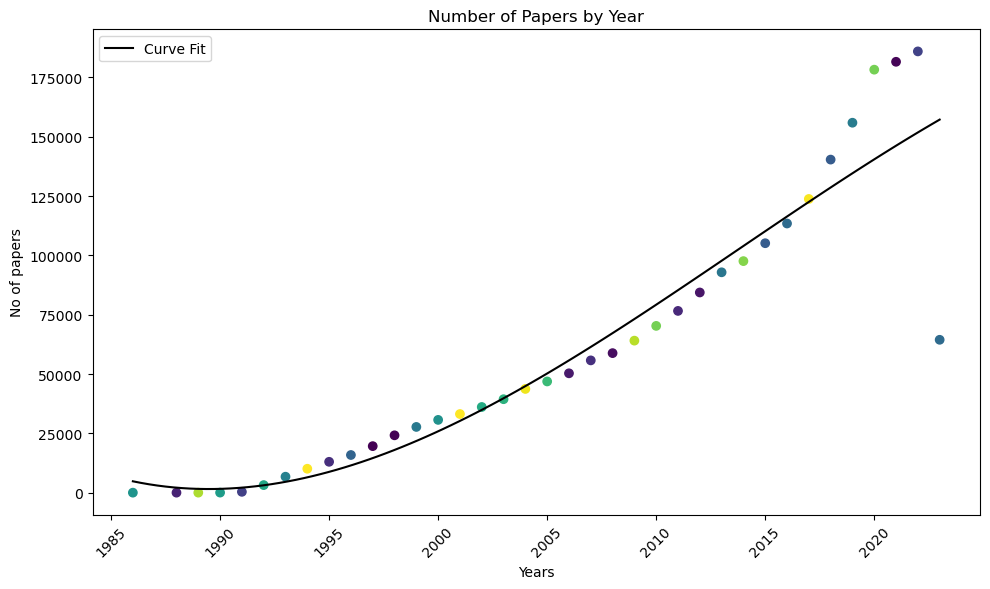

In [69]:
import matplotlib.pyplot as plt
import numpy as np

years = [2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2023,
2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996,
1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1986]

no_of_papers = [185976, 181599, 178275, 155917, 140377, 123781, 113440, 105130, 97590, 92875,
84374, 76602, 70288, 64429, 64071, 58810, 55749, 50305, 46874, 43713, 39392,
36105, 33140, 30669, 27700, 24170, 19610, 15872, 13006, 10078, 6729, 3190,
353, 26, 6, 1, 1]

# colors = np.random.rand(len(years))

# plt.figure(figsize=(10, 6))
# plt.scatter(years, no_of_papers, c=colors)
# plt.xlabel('Years')
# plt.ylabel('No of papers')
# plt.title('Number of Papers by Year')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
# Generate unique colors for each year
colors = np.random.rand(len(years))

# Fit a polynomial curve to the data
curve_fit = np.polyfit(years, no_of_papers, 3)  # Adjust the degree of the polynomial if needed
curve = np.poly1d(curve_fit)
curve_x = np.linspace(min(years), max(years), 100)
curve_y = curve(curve_x)

plt.figure(figsize=(10, 6))
plt.scatter(years, no_of_papers, c=colors)
plt.plot(curve_x, curve_y, color='black', label='Curve Fit')
plt.xlabel('Years')
plt.ylabel('No of papers')
plt.title('Number of Papers by Year')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
dfMusic1000 = pd.read_csv('/kaggle/input/AIMusic1000/AIMusic1000.csv', delimiter=',')

In [71]:
dfMusic1000.head()

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract,FullTextURL,RelatedURL
0,0,U Kalidas,""" 12"" Music Visualisation: Exploring Generative and Non-Generative techniques within a rhythmic framework in a performative spatial setting.",2023.0,NaN,openresearch.ocadu.ca,https://openresearch.ocadu.ca/id/eprint/4024/,NaN,796,2023-05-31 10:24:35,...,NaN,NaN,0,0.0,0,1,1.0,"… The two day workshop/ lec-dem involved participants working in groups to create Music on Ableton live Digital Audio Workstation, using AI based tools created by the TheKlong studio …",https://openresearch.ocadu.ca/id/eprint/4024/1/Kalidas_Unnikrishnan_2023_MDES_DIGF.pdf,NaN
1,6,"B Caramiaux, S Fdili Alaoui",""" Explorers of Unknown Planets"" Practices and Politics of Artificial Intelligence in Visual Arts",2022.0,Proceedings of the ACM on Human …,dl.acm.org,https://dl.acm.org/doi/abs/10.1145/3555578,https://scholar.google.com/scholar?cites=6161039021353815985&as_sdt=2005&sciodt=2007&hl=en,223,2023-05-31 10:24:35,...,NaN,NaN,6,6.0,3,2,1.0,"… and creatives are interacting with AI and ML in their creative process. In this section, we review previous works looking at AI and ML as creative tools, especially in music and visual arts. …",https://hal.inria.fr/hal-03762351/document,https://scholar.google.com/scholar?q=related:sU8d61hogFUJ:scholar.google.com/&scioq=music+ai&hl=en&as_sdt=2007&as_ylo=2022&as_yhi=2023
2,0,"E Deruty, M Grachten",""" Melatonin"": A Case Study on AI-induced Musical Style",2022.0,arXiv preprint arXiv:2208.08968,arxiv.org,https://arxiv.org/abs/2208.08968,NaN,157,2023-05-31 10:24:35,...,NaN,NaN,0,0.0,0,2,1.0,"… yet for the use of AI tools in music. Nevertheless we believe it is instructive to study how individual music artists use music AI tools, and how these shape the resulting music, as it can …",https://arxiv.org/pdf/2208.08968,https://scholar.google.com/scholar?q=related:ZHDCFeHS2mwJ:scholar.google.com/&scioq=music+ai&hl=en&as_sdt=2007&as_ylo=2022&as_yhi=2023
3,30,"A Vizcaíno-Verdú, I Aguaded",# ThisIsMeChallenge and Music for Empowerment of Marginalized Groups on TikTok,2022.0,Media and Communication,ssoar.info,https://www.ssoar.info/ssoar/handle/document/77858,https://scholar.google.com/scholar?cites=15934592861495898206&as_sdt=2005&sciodt=2007&hl=en,311,2023-05-31 10:24:35,...,NaN,NaN,30,30.0,15,2,1.0,"… introduces the musical theme of … music venue for social empowerment, we conducted a quantitative content analysis of 100 TikTok posts under the hashtag, and an artificial intelligence …",https://www.ssoar.info/ssoar/bitstream/handle/document/77858/ssoar-mediacomm-2022-1-vizcaino-verdu_et_al-ThisIsMeChallenge_and_Music_for_Empowerment.pdf?sequence=1&isAllowed=y,https://scholar.google.com/scholar?q=related:XjDwTcgLI90J:scholar.google.com/&scioq=music+ai&hl=en&as_sdt=2007&as_ylo=2022&as_yhi=2023
4,0,"JEK Parker, S Dockray","'All possible sounds': speech, music, and the emergence of machine listening",2023.0,Sound Studies,Taylor &Francis,https://www.tandfonline.com/doi/abs/10.1080/20551940.2023.2195057,NaN,357,2023-05-31 10:24:35,...,NaN,NaN,0,0.0,0,2,1.0,"… As we will see, from the 1940s to roughly the end of the 1980s, work on artificial intelligence and audio developed along two major streams. There was work on speech recognition/…",NaN,NaN


In [72]:
dfMusic1000.shape

(992, 26)

In [73]:
dfMusic1000['Title'] = dfMusic1000['Title'].astype(str)

dfMusic1000['Abstract'] = dfMusic1000['Abstract'].astype(str)

dfMusic1000.dtypes

Cites               int64
Authors            object
Title              object
Year              float64
Source             object
Publisher          object
ArticleURL         object
CitesURL           object
GSRank              int64
QueryDate          object
Type               object
DOI                object
ISSN              float64
CitationURL       float64
Volume            float64
Issue             float64
StartPage         float64
EndPage           float64
ECC                 int64
CitesPerYear      float64
CitesPerAuthor      int64
AuthorCount         int64
Age               float64
Abstract           object
FullTextURL        object
RelatedURL         object
dtype: object

In [74]:
music_all_keywords1

['Composition',
 'Compositional techniques',
 'Compositional processes',
 'Structure',
 'Form',
 'Melody',
 'Harmony',
 'Counterpoint',
 'Improvisation',
 'Arrangement',
 'Notation',
 'Analysis',
 'Aesthetics',
 'Computer-assisted composition',
 'Algorithmic composition',
 'Generative',
 'Creative AI',
 'Generating',
 'Generation',
 'mastering',
 'mixing',
 'mix',
 'master',
 'remixing',
 'composing']

In [75]:
dfMusic2022and2023 = dfMusic1000[dfMusic1000['Title'].apply(lambda title: any(keyword in title for keyword in music_all_keywords1)) |
                              dfMusic1000['Abstract'].apply(lambda abstract: any(keyword in abstract for keyword in music_all_keywords1))]

In [76]:
dfMusic2022and2023

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract,FullTextURL,RelatedURL
0,0,U Kalidas,""" 12"" Music Visualisation: Exploring Generative and Non-Generative techniques within a rhythmic framework in a performative spatial setting.",2023.0,NaN,openresearch.ocadu.ca,https://openresearch.ocadu.ca/id/eprint/4024/,NaN,796,2023-05-31 10:24:35,...,NaN,NaN,0,0.0,0,1,1.0,"… The two day workshop/ lec-dem involved participants working in groups to create Music on Ableton live Digital Audio Workstation, using AI based tools created by the TheKlong studio …",https://openresearch.ocadu.ca/id/eprint/4024/1/Kalidas_Unnikrishnan_2023_MDES_DIGF.pdf,NaN
12,11,"C Zhang, C Zhang, S Zheng, Y Qiao, C Li…",A Complete Survey on Generative AI (AIGC): Is ChatGPT from GPT-4 to GPT-5 All You Need?,2023.0,arXiv preprint arXiv …,arxiv.org,https://arxiv.org/abs/2303.11717,https://scholar.google.com/scholar?cites=10162538139609691591&as_sdt=2005&sciodt=2007&hl=en,340,2023-05-31 10:24:35,...,NaN,NaN,11,11.0,2,6,1.0,"… new music, while some software edit compositions in the style of various composers. Music … it is because of using AI to compose music or to help musicians. A fantastic illustration of an …",https://arxiv.org/pdf/2303.11717,NaN
17,0,S Lowe,A Fully-Unsupervised Generative Method for Choreo-Musical Translation,NaN,slowe.io,NaN,https://slowe.io/content/cs229.pdf,NaN,762,2023-05-31 10:24:35,...,NaN,NaN,0,0.0,0,1,NaN,… It is clear that AI systems applied to these tasks need similar … Our algorithm will be able to take as input either music (… that represents choreography and music that should be paired …,https://slowe.io/content/cs229.pdf,https://scholar.google.com/scholar?q=related:gM4lmW8KfdoJ:scholar.google.com/&scioq=music+ai&hl=en&as_sdt=2007&as_ylo=2022&as_yhi=2023
18,0,"H Wang, S Han, G Li, B Zhao",A Hybrid Neural Network for Music Generation Using Frequency Domain Data,2023.0,… Conference on Artificial Intelligence in …,Springer,https://link.springer.com/chapter/10.1007/978-981-99-1256-8_26,NaN,816,2023-05-31 10:24:35,...,NaN,NaN,0,0.0,0,4,1.0,"… adversarial network to generate music in an end-to-end way. The automatic music generation method proposed in this paper explores a new representation of music data, and the …",NaN,NaN
20,4,"PS Yadav, S Khan, YV Singh, P Garg…",A Lightweight Deep Learning-Based Approach for Jazz Music Generation in MIDI Format,2022.0,Computational …,hindawi.com,https://www.hindawi.com/journals/cin/2022/2140895/,https://scholar.google.com/scholar?cites=6733953986624070978&as_sdt=2005&sciodt=2007&hl=en,292,2023-05-31 10:24:35,...,NaN,NaN,4,4.0,1,5,1.0,"… In paper [15], jazz transformer-based AIcomposed music quantitative measures are discussed. is system measures the jazz transformation using the deep learning model. In paper [16], …",https://www.hindawi.com/journals/cin/2022/2140895/,https://scholar.google.com/scholar?q=related:QqWNCnnPc10J:scholar.google.com/&scioq=music+ai&hl=en&as_sdt=2007&as_ylo=2022&as_yhi=2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,3,"W Zai El Amri, O Tautz, H Ritter, A Melnik",Transfer learning with jukebox for music source separation,2022.0,Artificial Intelligence …,Springer,https://link.springer.com/chapter/10.1007/978-3-031-08337-2_35,https://scholar.google.com/scholar?cites=2578766836719982342&as_sdt=2005&sciodt=2007&hl=en,613,2023-05-31 10:24:35,...,NaN,NaN,3,3.0,1,4,1.0,"In this work, we demonstrate how a publicly available, pre-trained Jukebox model can be adapted for the problem of audio source separation from a single mixed audio channel. Our …",https://arxiv.org/pdf/2111.14200,https://scholar.google.com/scholar?q=related:BpdAbcaeySMJ:scholar.google.com/&scioq=music+ai&hl=en&as_sdt=2007&as_ylo=2022&as_yhi=2023
965,0,"A Ranjan, VNJ Behera, M Reza",Using a Bi-Directional Long Short-Term Memory Model with Attention Mechanism Train

In [77]:
dfMusic2022and2023 = dfMusic2022and2023.dropna(subset=['Title', 'Authors'])
dfMusic2022and2023

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract,FullTextURL,RelatedURL
0,0,U Kalidas,""" 12"" Music Visualisation: Exploring Generative and Non-Generative techniques within a rhythmic framework in a performative spatial setting.",2023.0,NaN,openresearch.ocadu.ca,https://openresearch.ocadu.ca/id/eprint/4024/,NaN,796,2023-05-31 10:24:35,...,NaN,NaN,0,0.0,0,1,1.0,"… The two day workshop/ lec-dem involved participants working in groups to create Music on Ableton live Digital Audio Workstation, using AI based tools created by the TheKlong studio …",https://openresearch.ocadu.ca/id/eprint/4024/1/Kalidas_Unnikrishnan_2023_MDES_DIGF.pdf,NaN
12,11,"C Zhang, C Zhang, S Zheng, Y Qiao, C Li…",A Complete Survey on Generative AI (AIGC): Is ChatGPT from GPT-4 to GPT-5 All You Need?,2023.0,arXiv preprint arXiv …,arxiv.org,https://arxiv.org/abs/2303.11717,https://scholar.google.com/scholar?cites=10162538139609691591&as_sdt=2005&sciodt=2007&hl=en,340,2023-05-31 10:24:35,...,NaN,NaN,11,11.0,2,6,1.0,"… new music, while some software edit compositions in the style of various composers. Music … it is because of using AI to compose music or to help musicians. A fantastic illustration of an …",https://arxiv.org/pdf/2303.11717,NaN
17,0,S Lowe,A Fully-Unsupervised Generative Method for Choreo-Musical Translation,NaN,slowe.io,NaN,https://slowe.io/content/cs229.pdf,NaN,762,2023-05-31 10:24:35,...,NaN,NaN,0,0.0,0,1,NaN,… It is clear that AI systems applied to these tasks need similar … Our algorithm will be able to take as input either music (… that represents choreography and music that should be paired …,https://slowe.io/content/cs229.pdf,https://scholar.google.com/scholar?q=related:gM4lmW8KfdoJ:scholar.google.com/&scioq=music+ai&hl=en&as_sdt=2007&as_ylo=2022&as_yhi=2023
18,0,"H Wang, S Han, G Li, B Zhao",A Hybrid Neural Network for Music Generation Using Frequency Domain Data,2023.0,… Conference on Artificial Intelligence in …,Springer,https://link.springer.com/chapter/10.1007/978-981-99-1256-8_26,NaN,816,2023-05-31 10:24:35,...,NaN,NaN,0,0.0,0,4,1.0,"… adversarial network to generate music in an end-to-end way. The automatic music generation method proposed in this paper explores a new representation of music data, and the …",NaN,NaN
20,4,"PS Yadav, S Khan, YV Singh, P Garg…",A Lightweight Deep Learning-Based Approach for Jazz Music Generation in MIDI Format,2022.0,Computational …,hindawi.com,https://www.hindawi.com/journals/cin/2022/2140895/,https://scholar.google.com/scholar?cites=6733953986624070978&as_sdt=2005&sciodt=2007&hl=en,292,2023-05-31 10:24:35,...,NaN,NaN,4,4.0,1,5,1.0,"… In paper [15], jazz transformer-based AIcomposed music quantitative measures are discussed. is system measures the jazz transformation using the deep learning model. In paper [16], …",https://www.hindawi.com/journals/cin/2022/2140895/,https://scholar.google.com/scholar?q=related:QqWNCnnPc10J:scholar.google.com/&scioq=music+ai&hl=en&as_sdt=2007&as_ylo=2022&as_yhi=2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,3,"W Zai El Amri, O Tautz, H Ritter, A Melnik",Transfer learning with jukebox for music source separation,2022.0,Artificial Intelligence …,Springer,https://link.springer.com/chapter/10.1007/978-3-031-08337-2_35,https://scholar.google.com/scholar?cites=2578766836719982342&as_sdt=2005&sciodt=2007&hl=en,613,2023-05-31 10:24:35,...,NaN,NaN,3,3.0,1,4,1.0,"In this work, we demonstrate how a publicly available, pre-trained Jukebox model can be adapted for the problem of audio source separation from a single mixed audio channel. Our …",https://arxiv.org/pdf/2111.14200,https://scholar.google.com/scholar?q=related:BpdAbcaeySMJ:scholar.google.com/&scioq=music+ai&hl=en&as_sdt=2007&as_ylo=2022&as_yhi=2023
965,0,"A Ranjan, VNJ Behera, M Reza",Using a Bi-Directional Long Short-Term Memory Model with Attention Mechanism Train

In [78]:
dfMusic2022and2023.columns

Index(['Cites', 'Authors', 'Title', 'Year', 'Source', 'Publisher',
       'ArticleURL', 'CitesURL', 'GSRank', 'QueryDate', 'Type', 'DOI', 'ISSN',
       'CitationURL', 'Volume', 'Issue', 'StartPage', 'EndPage', 'ECC',
       'CitesPerYear', 'CitesPerAuthor', 'AuthorCount', 'Age', 'Abstract',
       'FullTextURL', 'RelatedURL'],
      dtype='object')

In [79]:
dfMusic2022and2023 = pd.DataFrame({
    'Authors': dfMusic2022and2023['Authors'],
    'Title': dfMusic2022and2023['Title'],
    'Abstract': dfMusic2022and2023['Abstract'],
    'Year': dfMusic2022and2023['Year']
})

In [80]:
dfMusic2022and2023.shape

(202, 4)

In [81]:
dfMusic2022and2023.dtypes

Authors      object
Title        object
Abstract     object
Year        float64
dtype: object

In [82]:
dfMusic2022and2023.Year.value_counts()

2022.0    145
2023.0     45
Name: Year, dtype: int64

In [83]:
# dfMusic2022and2023 = dfMusic2022and2023['Year'].astype(int) if None
dfMusic2022and2023['Year'] = dfMusic2022and2023['Year'].fillna(0).astype(int)

dfMusic2022and2023.head()

,Authors,Title,Abstract,Year
0,U Kalidas,""" 12"" Music Visualisation: Exploring Generative and Non-Generative techniques within a rhythmic framework in a performative spatial setting.","… The two day workshop/ lec-dem involved participants working in groups to create Music on Ableton live Digital Audio Workstation, using AI based tools created by the TheKlong studio …",2023
12,"C Zhang, C Zhang, S Zheng, Y Qiao, C Li…",A Complete Survey on Generative AI (AIGC): Is ChatGPT from GPT-4 to GPT-5 All You Need?,"… new music, while some software edit compositions in the style of various composers. Music … it is because of using AI to compose music or to help musicians. A fantastic illustration of an …",2023
17,S Lowe,A Fully-Unsupervised Generative Method for Choreo-Musical Translation,… It is clear that AI systems applied to these tasks need similar … Our algorithm will be able to take as input either music (… that represents choreography and music that should be paired …,0
18,"H Wang, S Han, G Li, B Zhao",A Hybrid Neural Network for Music Generation Using Frequency Domain Data,"… adversarial network to generate music in an end-to-end way. The automatic music generation method proposed in this paper explores a new representation of music data, and the …",2023
20,"PS Yadav, S Khan, YV Singh, P Garg…",A Lightweight Deep Learning-Based Approach for Jazz Music Generation in MIDI Format,"… In paper [15], jazz transformer-based AIcomposed music quantitative measures are discussed. is system measures the jazz transformation using the deep learning model. In paper [16], …",2022


In [84]:
dfMusic2022and2023.dtypes

Authors     object
Title       object
Abstract    object
Year         int64
dtype: object

In [85]:
dfMusic2022and2023.shape

(202, 4)

In [86]:
#Music1000
dfONE = dfMusic2022and2023.reset_index(drop=True)

dfONE.head()

,Authors,Title,Abstract,Year
0,U Kalidas,""" 12"" Music Visualisation: Exploring Generative and Non-Generative techniques within a rhythmic framework in a performative spatial setting.","… The two day workshop/ lec-dem involved participants working in groups to create Music on Ableton live Digital Audio Workstation, using AI based tools created by the TheKlong studio …",2023
1,"C Zhang, C Zhang, S Zheng, Y Qiao, C Li…",A Complete Survey on Generative AI (AIGC): Is ChatGPT from GPT-4 to GPT-5 All You Need?,"… new music, while some software edit compositions in the style of various composers. Music … it is because of using AI to compose music or to help musicians. A fantastic illustration of an …",2023
2,S Lowe,A Fully-Unsupervised Generative Method for Choreo-Musical Translation,… It is clear that AI systems applied to these tasks need similar … Our algorithm will be able to take as input either music (… that represents choreography and music that should be paired …,0
3,"H Wang, S Han, G Li, B Zhao",A Hybrid Neural Network for Music Generation Using Frequency Domain Data,"… adversarial network to generate music in an end-to-end way. The automatic music generation method proposed in this paper explores a new representation of music data, and the …",2023
4,"PS Yadav, S Khan, YV Singh, P Garg…",A Lightweight Deep Learning-Based Approach for Jazz Music Generation in MIDI Format,"… In paper [15], jazz transformer-based AIcomposed music quantitative measures are discussed. is system measures the jazz transformation using the deep learning model. In paper [16], …",2022


In [87]:
#XRIV dataset
dfTWO = df_Music_Compose_data.reset_index(drop=True)
dfTWO.head() 

,Authors,Title,Abstract,Year
0,"Erica Bisesi, and Marisa Michelini",Planning Curricular Proposals on Sound and Music with Prospective SecondarySchool Teachers,Sound is a preferred context to build foundations on wave phenomena one ofthe most important disciplinary referents in physics It is also one of thebestset frameworks to achieve transversality overcoming scholastic level andactivating emotional aspects which are naturally connected with every day lifeas well as with music and perception Looking at sound and music by atransversal perspective a borderline approach between science and art isthe adopted statement for a teaching proposal using metacognition as astrategy in scientific education This work analyzes curricular proposals onmusical acoustics planned by prospective secondaryschool teachers in theframework of a Formative Intervention Module answering the expectation ofmaking more effective teaching scientific subjects by improving creativecapabilities as well as leading to build logical and scientificcategorizations able to consciously discipline artistic activity in musicstudents With this aim a particular emphasis is given to those concepts like sound parameters and structural elements of a musical piece which arebest fitted to be addressed on a transversal perspective involvingsimultaneously physics psychophysics and music,2008
1,"Fabien Gallot, Owen Lagadec, Myriam Desainte-Catherine (LaBRI),\n Sylvain Marchand (LaBRI)",iKlax a New Musical Audio Format for Active Listening,In this paper we are presenting a new model for interactive music Unlikemost interactive systems our model is based on file organization but does notrequire digital audio treatments This model includes a definition of aconstraints system and its solver The products of this project are intendedfor the general public inexperienced users as well as professional musiciansand will be distributed commercially We are here presenting three products ofthis project The difficulty of this project is to design a technology andsoftware products for interactive music which must be easy to use by thegeneral public and by professional composers,2009
2,"J.R. Dawin, D. Volchenkov",Markov Chain Analysis of Musical Dice Games,We have studied entropy redundancy complexity and first passage times tonotes for pieces of composers The successful understanding of tonalmusic calls for an experienced listener as entropy dominates over redundancyin musical messages First passage times to notes resolve tonality and featurea composer We also discuss the possible distances in space of musical dicegames and introduced the geodesic distance based on the Riemann structureassociated to the probability vectors rows of the transition matrices,2010
3,"Georg Boenn, Martin Brain, Marina De Vos and John ffitch",Automatic Music Composition using Answer Set Programming,Music composition used to be a pen and paper activity These these days musicis often composed with the aid of computer software even to the point wherethe computer compose parts of the score autonomously The composition of moststyles of music is governed by rules We show that by approaching theautomation analysis and verification of composition as a knowledgerepresentation task and formalising these rules in a suitable logical languagepowerful and expressive intelligent composition tools can be easily built Thisapplication paper describes the use of answer set programming to construct anautomated system named ANTON that can compose melodic harmonic and rhythmicmusic diagnose errors in human compositions and serve as a computeraidedcomposition tool The combination of harmonic rhythmic and melodic compositionin a single framework makes ANTON unique in the growing area of algorithmiccomposition With near realtime composition ANTON reaches the point where itcan not only be used as a component in an interactive composition tool but alsohas the potential for live performances and concerts or automatically generatedbackground mus

In [88]:
dfTWO['Year'] = dfTWO['Year'].fillna(0).astype(int)

In [89]:
dfTWO.dtypes

Authors     object
Title       object
Abstract    object
Year         int64
dtype: object

In [90]:
dfONE['Dataset'] = 'Music1000'
dfTWO['Dataset'] = 'ArXiV'

In [91]:
dfTWO['Year'].value_counts()

2022    74
2021    69
2020    57
2019    35
2017    32
2018    32
2023    28
2016    16
2015     6
2014     4
2012     3
2013     3
2010     2
2008     1
2009     1
2011     1
2002     1
Name: Year, dtype: int64

In [92]:
dfONE.head()

,Authors,Title,Abstract,Year,Dataset
0,U Kalidas,""" 12"" Music Visualisation: Exploring Generative and Non-Generative techniques within a rhythmic framework in a performative spatial setting.","… The two day workshop/ lec-dem involved participants working in groups to create Music on Ableton live Digital Audio Workstation, using AI based tools created by the TheKlong studio …",2023,Music1000
1,"C Zhang, C Zhang, S Zheng, Y Qiao, C Li…",A Complete Survey on Generative AI (AIGC): Is ChatGPT from GPT-4 to GPT-5 All You Need?,"… new music, while some software edit compositions in the style of various composers. Music … it is because of using AI to compose music or to help musicians. A fantastic illustration of an …",2023,Music1000
2,S Lowe,A Fully-Unsupervised Generative Method for Choreo-Musical Translation,… It is clear that AI systems applied to these tasks need similar … Our algorithm will be able to take as input either music (… that represents choreography and music that should be paired …,0,Music1000
3,"H Wang, S Han, G Li, B Zhao",A Hybrid Neural Network for Music Generation Using Frequency Domain Data,"… adversarial network to generate music in an end-to-end way. The automatic music generation method proposed in this paper explores a new representation of music data, and the …",2023,Music1000
4,"PS Yadav, S Khan, YV Singh, P Garg…",A Lightweight Deep Learning-Based Approach for Jazz Music Generation in MIDI Format,"… In paper [15], jazz transformer-based AIcomposed music quantitative measures are discussed. is system measures the jazz transformation using the deep learning model. In paper [16], …",2022,Music1000


In [93]:
dfTWO.head()

,Authors,Title,Abstract,Year,Dataset
0,"Erica Bisesi, and Marisa Michelini",Planning Curricular Proposals on Sound and Music with Prospective SecondarySchool Teachers,Sound is a preferred context to build foundations on wave phenomena one ofthe most important disciplinary referents in physics It is also one of thebestset frameworks to achieve transversality overcoming scholastic level andactivating emotional aspects which are naturally connected with every day lifeas well as with music and perception Looking at sound and music by atransversal perspective a borderline approach between science and art isthe adopted statement for a teaching proposal using metacognition as astrategy in scientific education This work analyzes curricular proposals onmusical acoustics planned by prospective secondaryschool teachers in theframework of a Formative Intervention Module answering the expectation ofmaking more effective teaching scientific subjects by improving creativecapabilities as well as leading to build logical and scientificcategorizations able to consciously discipline artistic activity in musicstudents With this aim a particular emphasis is given to those concepts like sound parameters and structural elements of a musical piece which arebest fitted to be addressed on a transversal perspective involvingsimultaneously physics psychophysics and music,2008,ArXiV
1,"Fabien Gallot, Owen Lagadec, Myriam Desainte-Catherine (LaBRI),\n Sylvain Marchand (LaBRI)",iKlax a New Musical Audio Format for Active Listening,In this paper we are presenting a new model for interactive music Unlikemost interactive systems our model is based on file organization but does notrequire digital audio treatments This model includes a definition of aconstraints system and its solver The products of this project are intendedfor the general public inexperienced users as well as professional musiciansand will be distributed commercially We are here presenting three products ofthis project The difficulty of this project is to design a technology andsoftware products for interactive music which must be easy to use by thegeneral public and by professional composers,2009,ArXiV
2,"J.R. Dawin, D. Volchenkov",Markov Chain Analysis of Musical Dice Games,We have studied entropy redundancy complexity and first passage times tonotes for pieces of composers The successful understanding of tonalmusic calls for an experienced listener as entropy dominates over redundancyin musical messages First passage times to notes resolve tonality and featurea composer We also discuss the possible distances in space of musical dicegames and introduced the geodesic distance based on the Riemann structureassociated to the probability vectors rows of the transition matrices,2010,ArXiV
3,"Georg Boenn, Martin Brain, Marina De Vos and John ffitch",Automatic Music Composition using Answer Set Programming,Music composition used to be a pen and paper activity These these days musicis often composed with the aid of computer software even to the point wherethe computer compose parts of the score autonomously The composition of moststyles of music is governed by rules We show that by approaching theautomation analysis and verification of composition as a knowledgerepresentation task and formalising these rules in a suitable logical languagepowerful and expressive intelligent composition tools can be easily built Thisapplication paper describes the use of answer set programming to construct anautomated system named ANTON that can compose melodic harmonic and rhythmicmusic diagnose errors in human compositions and serve as a computeraidedcomposition tool The combination of harmonic rhythmic and melodic compositionin a single framework makes ANTON unique in the growing area of algorithmiccomposition With near realtime composition ANTON reaches the point where itcan not only be used as a component in an interactive composition tool but alsohas the potential for live performances and concerts or automatical

In [94]:
dfFinal = pd.concat([dfONE, dfTWO]).drop_duplicates(subset='Title')

In [95]:
dfFinal

,Authors,Title,Abstract,Year,Dataset
0,U Kalidas,""" 12"" Music Visualisation: Exploring Generative and Non-Generative techniques within a rhythmic framework in a performative spatial setting.","… The two day workshop/ lec-dem involved participants working in groups to create Music on Ableton live Digital Audio Workstation, using AI based tools created by the TheKlong studio …",2023,Music1000
1,"C Zhang, C Zhang, S Zheng, Y Qiao, C Li…",A Complete Survey on Generative AI (AIGC): Is ChatGPT from GPT-4 to GPT-5 All You Need?,"… new music, while some software edit compositions in the style of various composers. Music … it is because of using AI to compose music or to help musicians. A fantastic illustration of an …",2023,Music1000
2,S Lowe,A Fully-Unsupervised Generative Method for Choreo-Musical Translation,… It is clear that AI systems applied to these tasks need similar … Our algorithm will be able to take as input either music (… that represents choreography and music that should be paired …,0,Music1000
3,"H Wang, S Han, G Li, B Zhao",A Hybrid Neural Network for Music Generation Using Frequency Domain Data,"… adversarial network to generate music in an end-to-end way. The automatic music generation method proposed in this paper explores a new representation of music data, and the …",2023,Music1000
4,"PS Yadav, S Khan, YV Singh, P Garg…",A Lightweight Deep Learning-Based Approach for Jazz Music Generation in MIDI Format,"… In paper [15], jazz transformer-based AIcomposed music quantitative measures are discussed. is system measures the jazz transformation using the deep learning model. In paper [16], …",2022,Music1000
...,...,...,...,...,...
360,Adarsh Kumar and Pedro Sarmento,From Words to Music A Study of Subword Tokenization Techniques in Symbolic Music Generation,Subword tokenization has been widely successful in textbased naturallanguage processing NLP tasks with Transformerbased models As Transformermodels become increasingly popular in symbolic musicrelated studies it isimperative to investigate the efficacy of subword tokenization in the symbolicmusic domain In this paper we explore subword tokenization techniques suchas bytepair encoding BPE in symbolic music generation and its impact on theoverall structure of generated songs Our experiments are based on three typesof MIDI datasets single trackmelody only multitrack with a singleinstrument and multitrack and multiinstrument We apply subword tokenizationon postmusical tokenization schemes and find that it enables the generation oflonger songs at the same time and improves the overall structure of thegenerated music in terms of objective metrics like structure indicator SIPitch Class Entropy etc We also compare two subword tokenization methods BPEand Unigram and observe that both methods lead to consistent improvements Ourstudy suggests that subword tokenization is a promising technique for symbolicmusic generation and may have broader implications for music compositionparticularly in cases involving complex data such as multitrack songs,2023,ArXiV
361,"Haolin Zhuang, Shun Lei, Long Xiao, Weiqin Li, Liyang Chen, Sicheng\n Yang, Zhiyong Wu, Shiyin Kang, Helen Meng",GTNBailando Genre Consistent LongTerm D Dance Generation based on Pretrained Genre Token Network,Musicdriven D dance generation has become an intensive research topic inrecent years with great potential for realworld applications Most existingmethods lack the consideration of genre which results in genre inconsistencyin the generated dance movements In addition the correlation between thedance genre and the music has not been investigated To address these issueswe propose a genreconsistent dance generation framework GTNBailando Firstwe propose the Genre Token Network GTN which infers the genre from music toenhance the genre consistency of longterm dance generation Second to improvethe generalization capability of the model the strategy of pretraining andfinetuning is adoptedExperimental results on the AIST da

In [96]:
dfFinal.shape

(560, 5)

In [97]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993241 sha256=6529e9ff8ed7ad565124a77117c61a1c6d33659641de3b1a8d63b8349c5aa0b4
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
Note: you may need to restart the kernel to use updated packages.


In [98]:
from langdetect import detect

# Function to detect the language of a given text
def detect_language(text):
    try:
        return detect(text)
    except:
        return None

# Filter papers that are only in English language
dfFinalEnglishPapers = dfFinal[dfFinal['Abstract'].apply(lambda x: detect_language(x) == 'en')]
dfFinalEnglishPapers

,Authors,Title,Abstract,Year,Dataset
0,U Kalidas,""" 12"" Music Visualisation: Exploring Generative and Non-Generative techniques within a rhythmic framework in a performative spatial setting.","… The two day workshop/ lec-dem involved participants working in groups to create Music on Ableton live Digital Audio Workstation, using AI based tools created by the TheKlong studio …",2023,Music1000
1,"C Zhang, C Zhang, S Zheng, Y Qiao, C Li…",A Complete Survey on Generative AI (AIGC): Is ChatGPT from GPT-4 to GPT-5 All You Need?,"… new music, while some software edit compositions in the style of various composers. Music … it is because of using AI to compose music or to help musicians. A fantastic illustration of an …",2023,Music1000
2,S Lowe,A Fully-Unsupervised Generative Method for Choreo-Musical Translation,… It is clear that AI systems applied to these tasks need similar … Our algorithm will be able to take as input either music (… that represents choreography and music that should be paired …,0,Music1000
3,"H Wang, S Han, G Li, B Zhao",A Hybrid Neural Network for Music Generation Using Frequency Domain Data,"… adversarial network to generate music in an end-to-end way. The automatic music generation method proposed in this paper explores a new representation of music data, and the …",2023,Music1000
4,"PS Yadav, S Khan, YV Singh, P Garg…",A Lightweight Deep Learning-Based Approach for Jazz Music Generation in MIDI Format,"… In paper [15], jazz transformer-based AIcomposed music quantitative measures are discussed. is system measures the jazz transformation using the deep learning model. In paper [16], …",2022,Music1000
...,...,...,...,...,...
360,Adarsh Kumar and Pedro Sarmento,From Words to Music A Study of Subword Tokenization Techniques in Symbolic Music Generation,Subword tokenization has been widely successful in textbased naturallanguage processing NLP tasks with Transformerbased models As Transformermodels become increasingly popular in symbolic musicrelated studies it isimperative to investigate the efficacy of subword tokenization in the symbolicmusic domain In this paper we explore subword tokenization techniques suchas bytepair encoding BPE in symbolic music generation and its impact on theoverall structure of generated songs Our experiments are based on three typesof MIDI datasets single trackmelody only multitrack with a singleinstrument and multitrack and multiinstrument We apply subword tokenizationon postmusical tokenization schemes and find that it enables the generation oflonger songs at the same time and improves the overall structure of thegenerated music in terms of objective metrics like structure indicator SIPitch Class Entropy etc We also compare two subword tokenization methods BPEand Unigram and observe that both methods lead to consistent improvements Ourstudy suggests that subword tokenization is a promising technique for symbolicmusic generation and may have broader implications for music compositionparticularly in cases involving complex data such as multitrack songs,2023,ArXiV
361,"Haolin Zhuang, Shun Lei, Long Xiao, Weiqin Li, Liyang Chen, Sicheng\n Yang, Zhiyong Wu, Shiyin Kang, Helen Meng",GTNBailando Genre Consistent LongTerm D Dance Generation based on Pretrained Genre Token Network,Musicdriven D dance generation has become an intensive research topic inrecent years with great potential for realworld applications Most existingmethods lack the consideration of genre which results in genre inconsistencyin the generated dance movements In addition the correlation between thedance genre and the music has not been investigated To address these issueswe propose a genreconsistent dance generation framework GTNBailando Firstwe propose the Genre Token Network GTN which infers the genre from music toenhance the genre consistency of longterm dance generation Second to improvethe generalization capability of the model the strategy of pretraining andfinetuning is adoptedExperimental results on the AIST da

In [99]:
# import pandas as pd

# # Create separate dataframes for papers mentioning Bert and GPT
# dfBertPapers = dfFinalEnglishPapers[dfFinalEnglishPapers['Title'].str.contains(r'\bBert\b', case=False) | dfFinalEnglishPapers['Abstract'].str.contains(r'\bBert\b', case=False)]
# dfGptPapers = dfFinalEnglishPapers[dfFinalEnglishPapers['Title'].str.contains(r'\bGPT\b', case=False) | dfFinalEnglishPapers['Abstract'].str.contains(r'\bGPT\b', case=False)]
# print(dfBertPapers.shape)
# print(dfGptPapers.shape)

In [100]:
# dfGptPapers

In [101]:
# dfBertPapers

In [102]:
# import re
# # Create a new column 'PrecedingWord' to store the word preceding "learning" in titles
# dfFinalEnglishPapers['PrecedingWord'] = dfFinalEnglishPapers['Title'].str.extract(r'(\S+)\s+learning', flags=re.IGNORECASE)

# # Get the top 10 words preceding "learning" and their counts
# top_words = dfFinalEnglishPapers['PrecedingWord'].value_counts().head(10)

# # Print the top 10 words and their counts
# for word, count in top_words.items():
#     print(word, count)


In [103]:
dfFinalEnglishPapers = dfFinalEnglishPapers.sort_values('Year', ascending=True)
dfFinalEnglishPapers_2022_2023 = dfFinalEnglishPapers[dfFinalEnglishPapers['Year'] >= 2022]
dfFinalEnglishPapersB42021 = dfFinalEnglishPapers[dfFinalEnglishPapers['Year'] < 2022]
dfFinalEnglishPapers_2022_2023.reset_index(drop=True, inplace=True)
dfFinalEnglishPapersB42021.reset_index(drop=True, inplace=True)

In [104]:
print(dfFinalEnglishPapers_2022_2023.shape)
print(dfFinalEnglishPapersB42021.shape)

(282, 5)
(275, 5)


In [105]:
dfFinalEnglishPapers_2022_2023.to_csv('/kaggle/working/Music_2022_2023_list_final2.csv', index=True, header= True)

In [106]:
dfFinalEnglishPapersB42021.to_csv('/kaggle/working/Music_B42021_list_final2.csv', index=True, header= True)

In [107]:
dfFinalEnglishPapers_2022_2023 = pd.read_csv('/kaggle/input/Input/Music_2022_2023_final.csv')

In [108]:
dfFinalEnglishPapers_2022_2023

,Unnamed: 0,Authors,Title,Abstract,Year,Dataset
0,0,"Carlos Hernandez-Olivan, Jose R. Beltran",musicaiz A Python Library for Symbolic Music Generation Analysis and Visualization,In this article we present musicaiz an objectoriented library foranalyzing generating and evaluating symbolic music The submodules of thepackage allow the user to create symbolic music data from scratch buildalgorithms to analyze symbolic music encode MIDI data as tokens to train deeplearning sequence models modify existing music data and evaluate musicgeneration systems The evaluation submodule builds on previous work toobjectively measure music generation systems and to be able to reproduce theresults of music generation models The library is publicly available onlineWe encourage the community to contribute and provide feedback,2022,ArXiV
1,1,"Zhihuan Kuang, Shi Zong, Jianbing Zhang, Jiajun Chen, Hongfu Liu",MusictoText Synaesthesia Generating Descriptive Text from Music Recordings,In this paper we consider a novel research problem musictotextsynaesthesia Different from the classical music tagging problem thatclassifies a music recording into predefined categories the musictotextsynaesthesia aims to generate descriptive texts from music recordings forfurther understanding Although this is a new and interesting application tothe machine learning community to our best knowledge the existingmusicrelated datasets do not contain the semantic descriptions on musicrecordings and cannot serve the musictotext synaesthesia task In light ofthis we collect a new dataset that contains aligned pairs of classicalmusic recordings and text descriptions Based on this we build a computationalmodel to generate sentences that can describe the content of the musicrecording To tackle the highly nondiscriminative classical music we design agroup topologypreservation loss in our computational model which considersmore samples as a group reference and preserves the relative topology amongdifferent samples Extensive experimental results qualitatively andquantitatively demonstrate the effectiveness of our proposed model over fiveheuristics or pretrained competitive methods and their variants on ourcollected dataset,2022,ArXiV
2,2,"Yi Luo, Jianwei Yu",Music Source Separation with Bandsplit RNN,The performance of music source separation MSS models has been greatlyimproved in recent years thanks to the development of novel neural networkarchitectures and training pipelines However recent model designs for MSSwere mainly motivated by other audio processing tasks or other research fieldswhile the intrinsic characteristics and patterns of the music signals were notfully discovered In this paper we propose bandsplit RNN BSRNN afrequencydomain model that explictly splits the spectrogram of the mixtureinto subbands and perform interleaved bandlevel and sequencelevel modelingThe choices of the bandwidths of the subbands can be determined by a prioriknowledge or expert knowledge on the characteristics of the target source inorder to optimize the performance on a certain type of target musicalinstrument To better make use of unlabeled data we also describe asemisupervised model finetuning pipeline that can further improve theperformance of the model Experiment results show that BSRNN trained only onMUSDBHQ dataset significantly outperforms several topranking models inMusic Demixing MDX Challenge and the semisupervised finetuning stagefurther improves the performance on all four instrument tracks,2022,ArXiV
3,3,"Yusong Wu, Josh Gardner, Ethan Manilow, Ian Simon, Curtis Hawthorne,\n Jesse Engel",The Chamber Ensemble Generator Limitless HighQuality MIR Data via Generative Modeling,Data is the lifeblood of modern machine learning systems including for thosein Music Information Retrieval MIR However MIR has long been mired by smalldatasets and unreliable labels In this work we propose to break thisbottleneck using generative modeling By pipelining a generative model of notesCoconet trained on B

In [109]:
dfFinalEnglishPapersB42021 = pd.read_csv('/kaggle/input/Input/Music_B42021_final.csv')

In [110]:
dfFinalEnglishPapersB42021

,Unnamed: 0,Authors,Title,Abstract,Year,Dataset
0,0,"E Idrobo-Ávilaa, H Loaiza-Correaa, F Muñoz-Bolañosb…",Heart Response to Harmonic Music Interval Stimuli Via Deep Learning Structures,… Artificial intelligence techniques have recently been … on the heart of harmonic musical intervals and colored noise. … it could be incorporated into future music perception research. …,0,Music_2022_2023
1,1,"SJ Niharika, N Nityashree, RS Rachana…",Music Generation using Deep Learning and Implementation on Piano,"… make AI creative. By learning to generate music through deep learning models, we can make AI … In this paper, we present the use of the LSTM model architecture to generate music. The …",0,Music_2022_2023
2,2,S Lowe,A Fully-Unsupervised Generative Method for Choreo-Musical Translation,… It is clear that AI systems applied to these tasks need similar … Our algorithm will be able to take as input either music (… that represents choreography and music that should be paired …,0,Music_2022_2023
3,3,"W Sun, R Sundarasekar",Research on pattern recognition of different music types in the context of AI with the help of multimedia information processing,… to use artificial intelligence for algorithmic music by incorporating AI techniques as the primary compositional generator. Artificial intelligence models used in composing music include …,0,Music_2022_2023
4,4,L Wang,The Mathematical Analysis Model of Educational System in Music Courses in Colleges and Universities,"… An experiment testing expectancy violation theory and AI music. new media &society.,2021; … An experiment testing expectancy violation theory and AI music. new media &society 2021 …",0,Music_2022_2023
...,...,...,...,...,...,...
270,270,"Gunjan Aggarwal, Devi Parikh",DanceMusic Automatic Dancedriven Music Generation,Dance and music typically go hand in hand The complexities in dance musicand their synchronisation make them fascinating to study from a computationalcreativity perspective While several works have looked at generating dance fora given music automatically generating music for a given dance remainsunderexplored This capability could have several creative expression andentertainment applications We present some early explorations in thisdirection We present a searchbased offline approach that generates musicafter processing the entire dance video and an online approach that uses a deepneural network to generate music onthefly as the video proceeds We comparethese approaches to a strong heuristic baseline via human studies and presentour findings We have integrated our online approach in a live demo A video ofthe demo can be found herehttpssitesgooglecomviewdancemusiclivedemo,2021,ArXiV
271,271,"Hugo Flores Garcia, Aldo Aguilar, Ethan Manilow, Bryan Pardo",Leveraging Hierarchical Structures for FewShot Musical Instrument Recognition,Deep learning work on musical instrument recognition has generally focused oninstrument classes for which we have abundant data In this work we exploithierarchical relationships between instruments in a fewshot learning setup toenable classification of a wider set of musical instruments given a fewexamples at inference We apply a hierarchical loss function to the training ofprototypical networks combined with a method to aggregate prototypeshierarchically mirroring the structure of a predefined musical instrumenthierarchy These extensions require no changes to the network architecture andnew levels can be easily added or removed Compared to a nonhierarchicalfewshot baseline our method leads to a significant increase in classificationaccuracy and significant decrease mistake severity on instrument classes unseenin training,2021,ArXiV
272,272,Mila Soares de Oliveira de Souza and Pedro Nuno de Souza Moura and\n Jean-Pierre Briot,Music Tempo Estimation via Neural Networks A Comparative Analysis,This paper presents a comparative analysis on two artificial neural networkswith different architectures for the task of tempo estimation For thispurpo

In [111]:
music_Transformer_keywords = ["Transformer", "generative","generation", "generate", "generation"]

dfFinalEnglishPapers_2022_2023

In [112]:
df_transformers_2022_2023 = dfFinalEnglishPapers_2022_2023[ dfFinalEnglishPapers_2022_2023['Title'].apply(lambda abstract: any(keyword in abstract for keyword in music_Transformer_keywords))|
    dfFinalEnglishPapers_2022_2023['Abstract'].apply(lambda abstract: any(keyword in abstract for keyword in music_Transformer_keywords))]

In [113]:
df_transformers_2022_2023.shape

(124, 6)

In [114]:
dfTransformers_B42021 = dfFinalEnglishPapersB42021[ dfFinalEnglishPapersB42021['Title'].apply(lambda abstract: any(keyword in abstract for keyword in music_Transformer_keywords))|
    dfFinalEnglishPapersB42021['Abstract'].apply(lambda abstract: any(keyword in abstract for keyword in music_Transformer_keywords))]

In [117]:
dfTransformers_B42021.shape

(147, 6)

In [118]:
others_keywords = ["LSTM", "GAN", "RNN", "GRU", "VAE", "AutoEncoder"] # Add more models as needed
# dfFinalEnglishPapersB42021

In [119]:
#LSTM in 2022_2023
df_others_2022_2023 = dfFinalEnglishPapers_2022_2023[ dfFinalEnglishPapers_2022_2023['Title'].apply(lambda abstract: any(keyword in abstract for keyword in others_keywords))|
    dfFinalEnglishPapers_2022_2023['Abstract'].apply(lambda abstract: any(keyword in abstract for keyword in others_keywords))]

In [120]:
df_others_2022_2023.shape

(28, 6)

In [121]:
#LSTM in B42021
df_others_B4_2021 = dfFinalEnglishPapersB42021[ dfFinalEnglishPapersB42021['Title'].apply(lambda abstract: any(keyword in abstract for keyword in others_keywords))|
    dfFinalEnglishPapersB42021['Abstract'].apply(lambda abstract: any(keyword in abstract for keyword in others_keywords))]

In [122]:
#LSTM in B42021
df_others_B42021 = dfFinalEnglishPapersB42021[ dfFinalEnglishPapersB42021['Title'].apply(lambda abstract: any(keyword in abstract for keyword in others_keywords))|
    dfFinalEnglishPapersB42021['Abstract'].apply(lambda abstract: any(keyword in abstract for keyword in others_keywords))]

In [123]:
df_others_B42021

,Unnamed: 0,Authors,Title,Abstract,Year,Dataset
1,1,"SJ Niharika, N Nityashree, RS Rachana…",Music Generation using Deep Learning and Implementation on Piano,"… make AI creative. By learning to generate music through deep learning models, we can make AI … In this paper, we present the use of the LSTM model architecture to generate music. The …",0,Music_2022_2023
26,26,"I-Ting Liu, Bhiksha Ramakrishnan",Bach in Music Composition with Recurrent Neural Network,We propose a framework for computer music composition that uses resilientpropagation RProp and long short term memory LSTM recurrent neural networkIn this paper we show that LSTM network learns the structure andcharacteristics of music pieces properly by demonstrating its ability torecreate music We also show that predicting existing music using RPropoutperforms Back propagation through time BPTT,2014,ArXiV
36,36,"Vasanth Kalingeri, Srikanth Grandhe",Music Generation with Deep Learning,The use of deep learning to solve problems in literary arts has been a recenttrend that has gained a lot of attention and automated generation of music hasbeen an active area This project deals with the generation of music using rawaudio files in the frequency domain relying on various LSTM architecturesFully connected and convolutional layers are used along with LSTMs to capturerich features in the frequency domain and increase the quality of musicgenerated The work is focused on unconstrained music generation and uses noinformation about musical structurenotes or chords to aid learningThe musicgenerated from various architectures are compared using blind fold tests Usingthe raw audio to train models is the direction to tapping the enormous amountof mp files that exist over the internet without requiring the manual effortto make structured MIDI files Moreover not all audio files can be representedwith MIDI files making the study of these models an interesting prospect to thefuture of such models,2016,ArXiV
38,38,"Mason Bretan, Gil Weinberg, and Larry Heck",A Unit Selection Methodology for Music Generation Using Deep Neural Networks,Several methods exist for a computer to generate music based on dataincluding Markov chains recurrent neural networks recombinancy and grammarsWe explore the use of unit selection and concatenation as a means of generatingmusic using a procedure based on ranking where we consider a unit to be avariable length number of measures of music We first examine whether a unitselection method that is restricted to a finite size unit library can besufficient for encompassing a wide spectrum of music We do this by developinga deep autoencoder that encodes a musical input and reconstructs the input byselecting from the library We then describe a generative model that combines adeep structured semantic model DSSM with an LSTM to predict the next unitwhere units consist of four two and one measures of music We evaluate thegenerative model using objective metrics including mean rank and accuracy andwith a subjective listening test in which expert musicians are asked tocomplete a forcedchoiced ranking task We compare our model to a notelevelgenerative baseline that consists of a stacked LSTM trained to predict forwardby one note,2016,ArXiV
45,45,"Keunwoo Choi, George Fazekas, Mark Sandler",Textbased LSTM networks for Automatic Music Composition,In this paper we introduce new methods and discuss results of textbasedLSTM Long ShortTerm Memory networks for automatic music composition Theproposed network is designed to learn relationships within text documents thatrepresent chord progressions and drum tracks in two case studies In theexperiments wordRNNs Recurrent Neural Networks show good results for bothcases while characterbased RNNs charRNNs only succeed to learn chordprogressions The proposed system can be used for fully automatic compositionor as semiautomatic systems that help humans to compose music by controlling adiversity parameter of the model,2016,ArXiV
...,...,...,...,.

In [124]:
print("Papers_2022_2023          : ",dfFinalEnglishPapers_2022_2023.shape)
print("PapersB42021              : ",dfFinalEnglishPapersB42021.shape)
print("Transformers_2022_2023    : ",df_transformers_2022_2023.shape)
print("Transformers_B42021       : ",dfTransformers_B42021.shape)
print("LSTM etc_2022_2023        : ",df_others_2022_2023.shape)
print("LSTM etc_B42021           : ",df_others_B42021.shape)

Papers_2022_2023          :  (282, 6)
PapersB42021              :  (275, 6)
Transformers_2022_2023    :  (124, 6)
Transformers_B42021       :  (147, 6)
LSTM etc_2022_2023        :  (28, 6)
LSTM etc_B42021           :  (71, 6)


In [125]:
dfTransformers = pd.concat([df_transformers_2022_2023, dfTransformers_B42021]).drop_duplicates(subset='Title')

In [126]:
dfTransformers = dfTransformers.drop(columns="Unnamed: 0").reset_index(drop=True)
dfTransformers.to_csv('/kaggle/working/dfTransformersAllYears.csv', index=True, header=True)

In [127]:
dfTransformers = pd.read_csv("/kaggle/input/TransformersAllYears/dfTransformersAllYears.csv")


In [128]:
dfTransformers

,Unnamed: 0,Authors,Title,Abstract,Year,Dataset
0,0,"Carlos Hernandez-Olivan, Jose R. Beltran",musicaiz A Python Library for Symbolic Music Generation Analysis and Visualization,In this article we present musicaiz an objectoriented library foranalyzing generating and evaluating symbolic music The submodules of thepackage allow the user to create symbolic music data from scratch buildalgorithms to analyze symbolic music encode MIDI data as tokens to train deeplearning sequence models modify existing music data and evaluate musicgeneration systems The evaluation submodule builds on previous work toobjectively measure music generation systems and to be able to reproduce theresults of music generation models The library is publicly available onlineWe encourage the community to contribute and provide feedback,2022,ArXiV
1,1,"Zhihuan Kuang, Shi Zong, Jianbing Zhang, Jiajun Chen, Hongfu Liu",MusictoText Synaesthesia Generating Descriptive Text from Music Recordings,In this paper we consider a novel research problem musictotextsynaesthesia Different from the classical music tagging problem thatclassifies a music recording into predefined categories the musictotextsynaesthesia aims to generate descriptive texts from music recordings forfurther understanding Although this is a new and interesting application tothe machine learning community to our best knowledge the existingmusicrelated datasets do not contain the semantic descriptions on musicrecordings and cannot serve the musictotext synaesthesia task In light ofthis we collect a new dataset that contains aligned pairs of classicalmusic recordings and text descriptions Based on this we build a computationalmodel to generate sentences that can describe the content of the musicrecording To tackle the highly nondiscriminative classical music we design agroup topologypreservation loss in our computational model which considersmore samples as a group reference and preserves the relative topology amongdifferent samples Extensive experimental results qualitatively andquantitatively demonstrate the effectiveness of our proposed model over fiveheuristics or pretrained competitive methods and their variants on ourcollected dataset,2022,ArXiV
2,2,"Yusong Wu, Josh Gardner, Ethan Manilow, Ian Simon, Curtis Hawthorne,\n Jesse Engel",The Chamber Ensemble Generator Limitless HighQuality MIR Data via Generative Modeling,Data is the lifeblood of modern machine learning systems including for thosein Music Information Retrieval MIR However MIR has long been mired by smalldatasets and unreliable labels In this work we propose to break thisbottleneck using generative modeling By pipelining a generative model of notesCoconet trained on Bach Chorales with a structured synthesis model of chamberensembles MIDIDDSP trained on URMP we demonstrate a system capable ofproducing unlimited amounts of realistic chorale music with rich annotationsincluding mixes stems MIDI notelevel performance attributes staccatovibrato etc and even finegrained synthesis parameters pitch amplitudeetc We call this system the Chamber Ensemble Generator CEG and use it togenerate a large dataset of chorales from four different chamber ensemblesCocoChorales We demonstrate that data generated using our approach improvesstateoftheart models for music transcription and source separation and werelease both the system and the dataset as an opensource foundation for futurework in the MIR community,2022,ArXiV
3,3,"Jingwei Zhao, Gus Xia, Ye Wang",Domain Adversarial Training on Conditional Variational AutoEncoder for Controllable Music Generation,The variational autoencoder has become a leading framework for symbolicmusic generation and a popular research direction is to study how toeffectively control the generation process A straightforward way is to controla model using different conditions during inference However in musicpractice conditions are usually sequential rather than simple categoricallabels involving rich information that overlaps wi